* Сгенерируем данные
* Разобъем их на кластеры с помощью KMeans
* Определим оптимальное число кластеров в этих данных
* Разобъем эти же данные на кластеры с помощью GaussianMixture
* Применим оба алгоритма к реальному примеру

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# K-means алгоритм

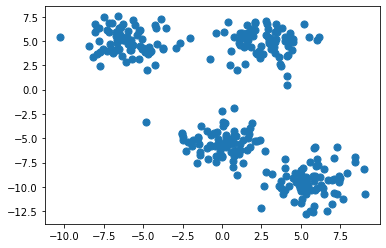

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

## 2 кластера

In [3]:
kmeans = KMeans(n_clusters=2, random_state=10, n_jobs=-1).fit(X)

In [4]:
labels = kmeans.labels_

In [5]:
labels

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [6]:
centers = kmeans.cluster_centers_
centers

array([[-1.68187558,  4.89652631],
       [ 2.94383075, -7.55856199]])

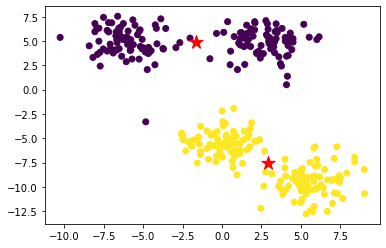

In [7]:
plt.scatter(X[:,0], X[:,1], c=labels);
plt.scatter(centers[:,0], centers[:,1], marker = '*', s=200, c='r');

## 3 кластера

In [8]:
kmeans = KMeans(n_clusters=3, random_state=10, n_jobs=-1).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

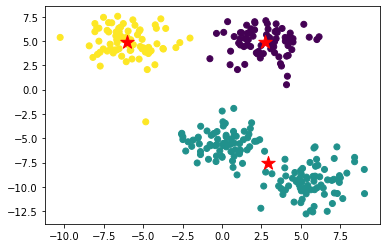

In [9]:
plt.scatter(X[:,0], X[:,1], c=labels);
plt.scatter(centers[:,0], centers[:,1], marker = '*', s=200, c='r');

## 4 кластера

In [10]:
kmeans = KMeans(n_clusters=4, random_state=10, n_jobs=-1).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

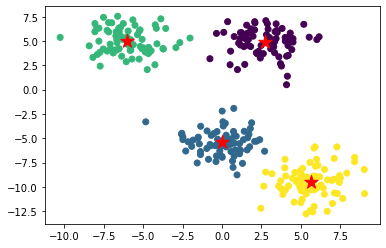

In [11]:
plt.scatter(X[:,0], X[:,1], c=labels);
plt.scatter(centers[:,0], centers[:,1], marker = '*', s=200, c='r');

## 5 кластеров

In [12]:
kmeans = KMeans(n_clusters=5, random_state=10, n_jobs=-1).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

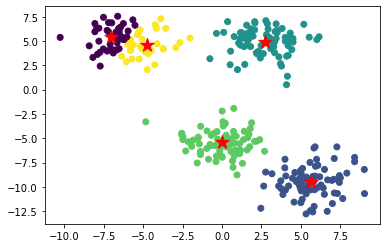

In [13]:
plt.scatter(X[:,0], X[:,1], c=labels);
plt.scatter(centers[:,0], centers[:,1], marker = '*', s=200, c='r');

Возвращаемся в презентацию

In [14]:
kmeans.inertia_

1055.9994314768628

## Выбор числа кластеров

In [15]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_jobs=-1).fit(X)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

In [16]:
inertia

[19080.349500026125,
 5841.459148406837,
 2988.1666700992337,
 1168.0418508382372,
 1055.9994314768628,
 931.5951739917518,
 832.3624737961377,
 731.7412268323615,
 666.1594328875357,
 614.508962312497]

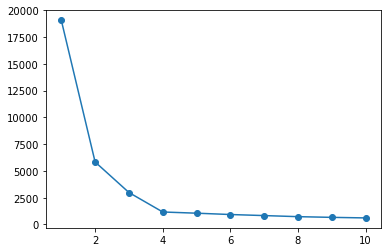

In [17]:
plt.plot(range(1,11), inertia, marker='o');

In [18]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)

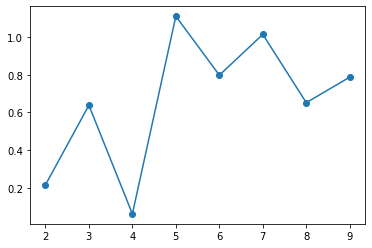

In [19]:
plt.plot(range(2,10), D, marker='o');

## Сложные формы данных

In [20]:
def kmeans_clustering(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=-1).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    plt.scatter(X[:,0], X[:,1], c=labels);
    plt.scatter(centers[:,0], centers[:,1], marker = '*', s=200, c='r');
    plt.title(str(n_clusters)+' кластера')
    plt.show();

### two moons

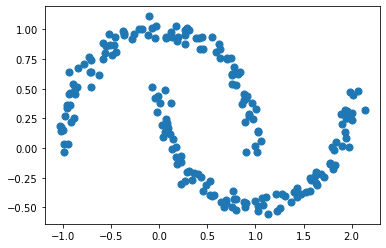

In [21]:
X, y = make_moons(200, noise=.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

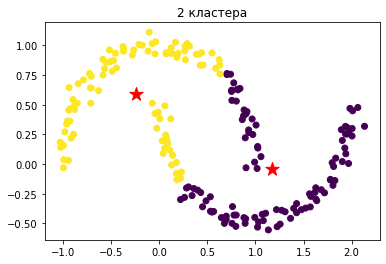

In [22]:
kmeans_clustering(2,X)

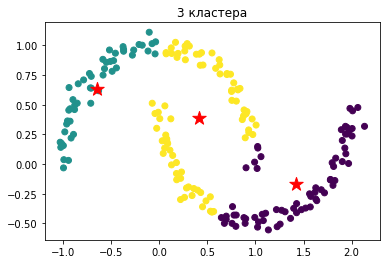

In [23]:
kmeans_clustering(3,X)

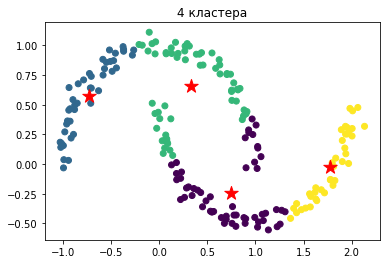

In [24]:
kmeans_clustering(4,X)

### circles

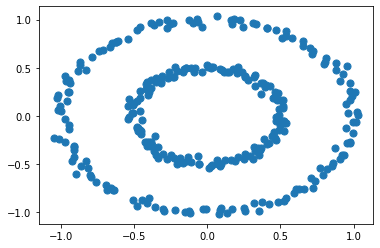

In [25]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

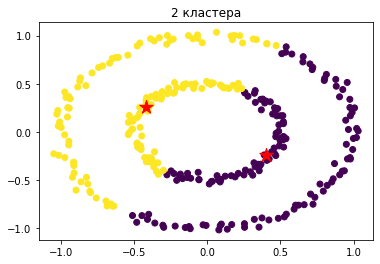

In [26]:
kmeans_clustering(2,X)

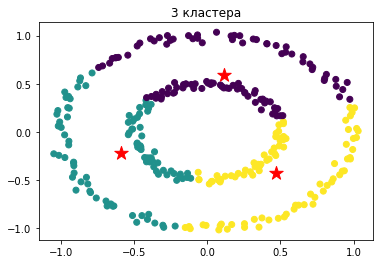

In [27]:
kmeans_clustering(3,X)

### Anisotropicly Distributed

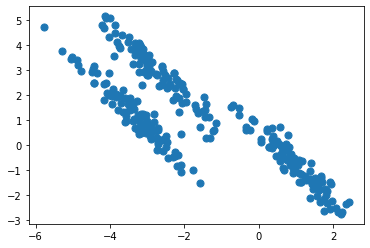

In [28]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

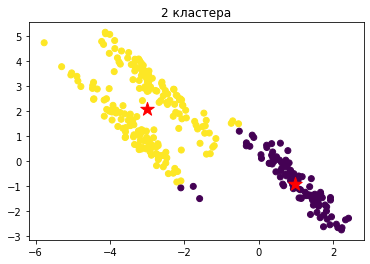

In [29]:
kmeans_clustering(2,X)

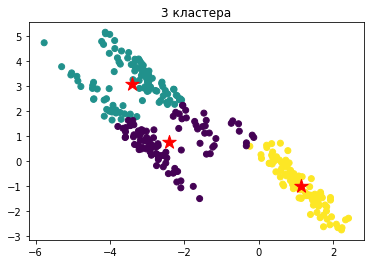

In [30]:
kmeans_clustering(3,X)

Возвращаемся в презентацию

# EM алгоритм - Gaussian mixtures

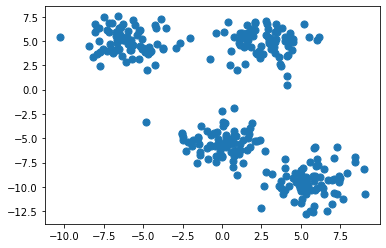

In [31]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

## 2 кластера

In [32]:
gauss = GaussianMixture(n_components=2, random_state=10).fit(X)

In [33]:
labels = gauss.predict(X)

In [34]:
labels

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0], d

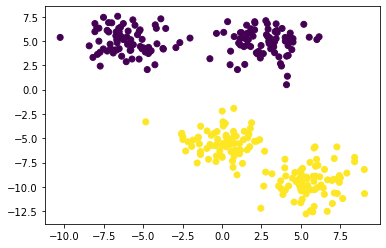

In [35]:
plt.scatter(X[:,0], X[:,1], c=labels);

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

In [36]:
from matplotlib.colors import LogNorm

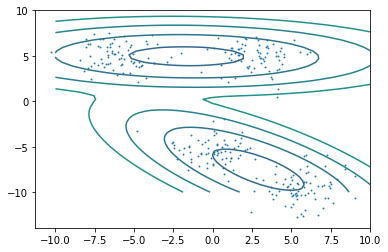

In [37]:
x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X_, Y_ = np.meshgrid(x, y)
XX = np.array([X_.ravel(), Y_.ravel()]).T
Z = -gauss.score_samples(XX)
Z = Z.reshape(X_.shape)

CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 1, 10))
plt.scatter(X[:, 0], X[:, 1], .8);

## 3 кластера

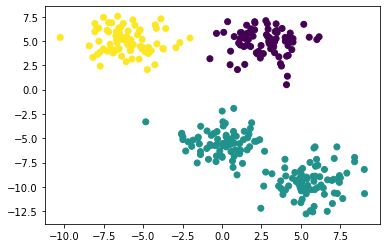

In [38]:
gauss = GaussianMixture(n_components=3, random_state=10).fit(X)
labels = gauss.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels);

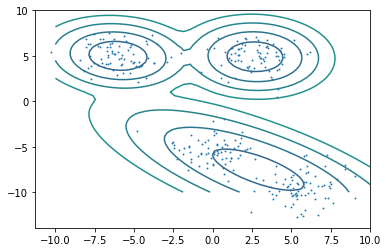

In [39]:
x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X_, Y_ = np.meshgrid(x, y)
XX = np.array([X_.ravel(), Y_.ravel()]).T
Z = -gauss.score_samples(XX)
Z = Z.reshape(X_.shape)

CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 1, 10))
plt.scatter(X[:, 0], X[:, 1], .8);

## 4 кластера

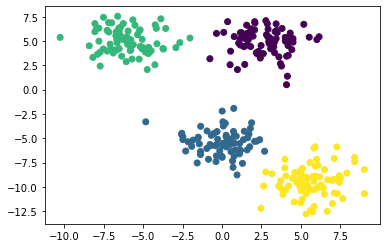

In [40]:
gauss = GaussianMixture(n_components=4, random_state=10).fit(X)
labels = gauss.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels);

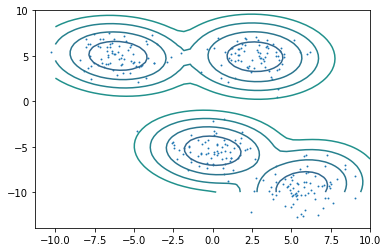

In [41]:
x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X_, Y_ = np.meshgrid(x, y)
XX = np.array([X_.ravel(), Y_.ravel()]).T
Z = -gauss.score_samples(XX)
Z = Z.reshape(X_.shape)

CS = plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 1, 10))
plt.scatter(X[:, 0], X[:, 1], .8);

## Сложные формы данных

In [42]:
def gaussian_clustering(n_clusters, X):
    gauss = GaussianMixture(n_components=n_clusters, random_state=10).fit(X)
    labels = gauss.predict(X)
    
    plt.scatter(X[:,0], X[:,1], c=labels);
    plt.title(str(n_clusters)+' кластера')
    plt.show();

### two moons

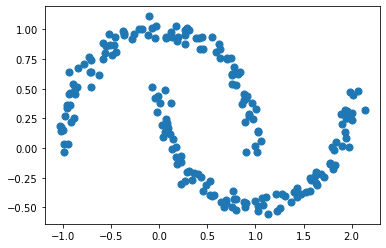

In [43]:
X, y = make_moons(200, noise=.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

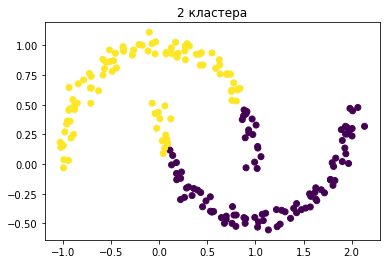

In [44]:
gaussian_clustering(2,X)

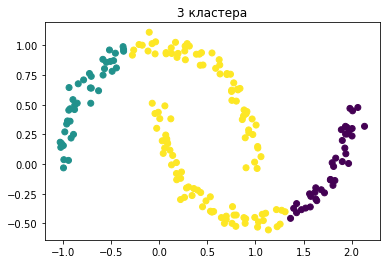

In [45]:
gaussian_clustering(3,X)

### circles

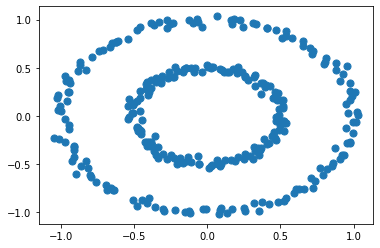

In [46]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

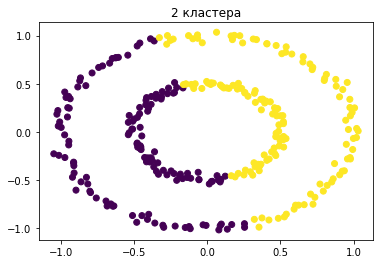

In [47]:
gaussian_clustering(2,X)

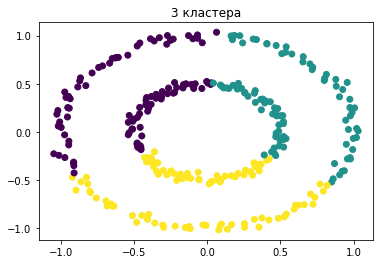

In [48]:
gaussian_clustering(3,X)

### Anisotropicly Distributed

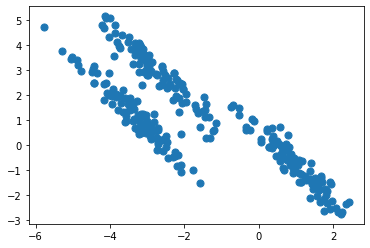

In [49]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

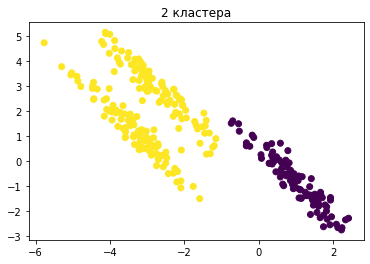

In [50]:
gaussian_clustering(2,X)

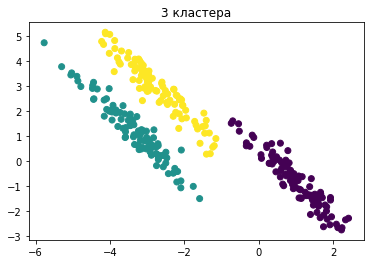

In [51]:
gaussian_clustering(3,X)

# Кластеризация на реальных данных

https://www.kaggle.com/unsdsn/world-happiness

In [52]:
data = pd.read_csv('data/2019.csv')

In [53]:
data.shape

(156, 9)

In [54]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [56]:
data['Overall rank'].nunique()

156

In [57]:
data.drop('Overall rank', axis=1, inplace=True)

In [58]:
data['Country or region'].nunique()

156

In [59]:
country = data['Country or region']

In [60]:
data.drop('Country or region', axis=1, inplace=True)

In [61]:
data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


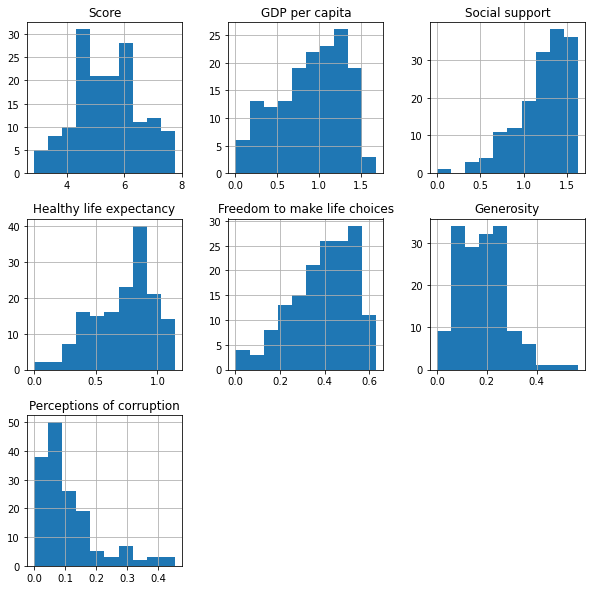

In [62]:
data.hist(figsize=(10,10));

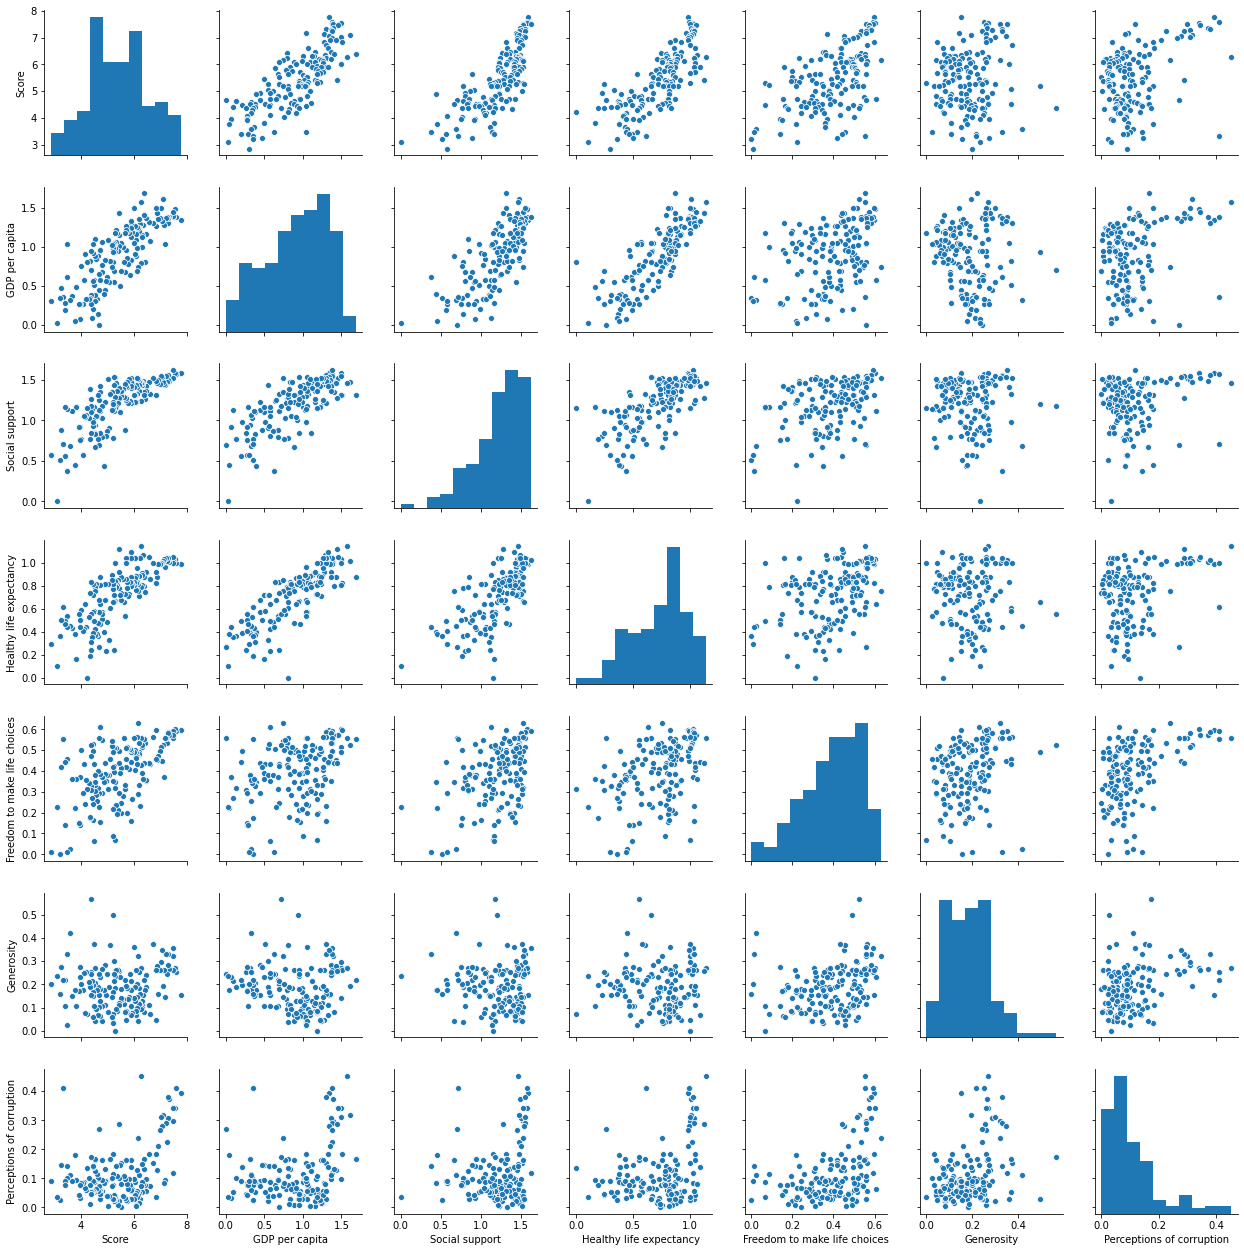

In [63]:
sns.pairplot(data);

## 1.4 Корреляция

In [64]:
corr = data.corr()

In [65]:
mask = np.triu(np.ones_like(corr, dtype=bool))

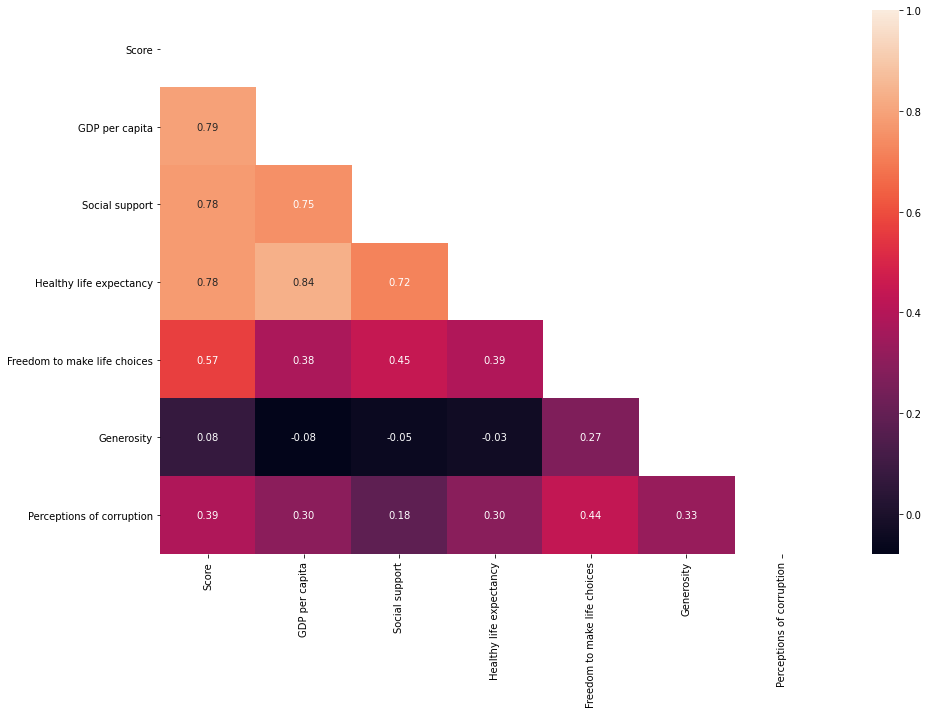

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

# 2. Нормализация

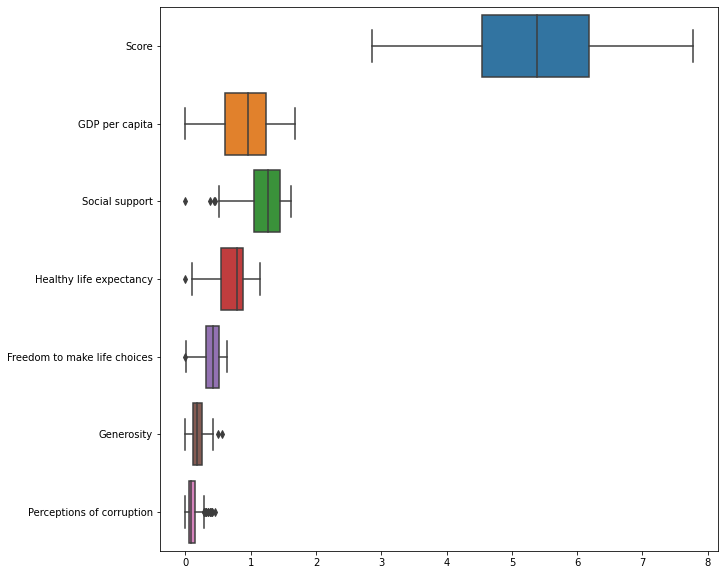

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
X_scaled = scaler.fit_transform(data)

In [71]:
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)

In [72]:
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


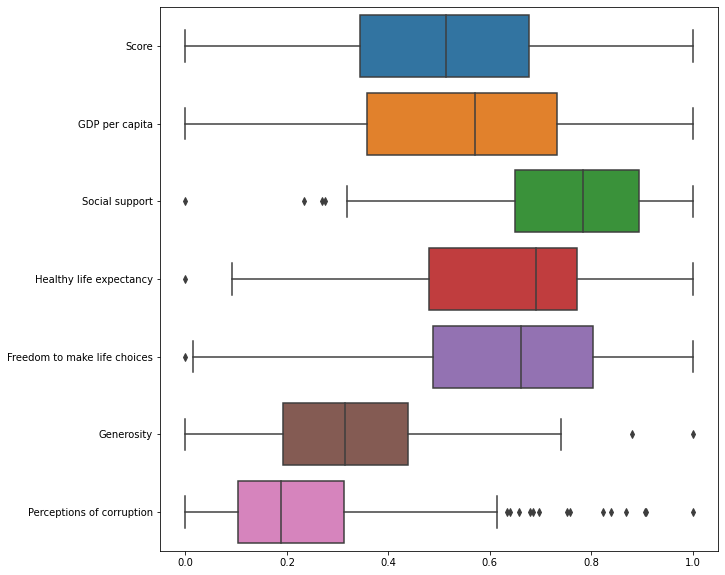

In [73]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_scaled, orient='h');

# 3. Снижение размерности для визуализации

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(n_components=2, random_state=10)

In [76]:
X_tsne = tsne.fit_transform(X_scaled)

In [85]:
X_scaled.shape

(156, 7)

In [77]:
X_tsne.shape

(156, 2)

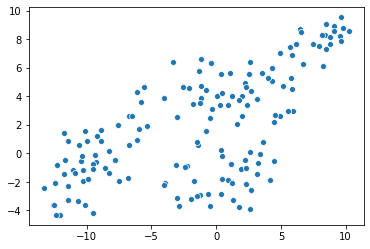

In [78]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1]);

# 4. Кластеризация

## 4.1 KMeans

In [79]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_jobs=-1).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

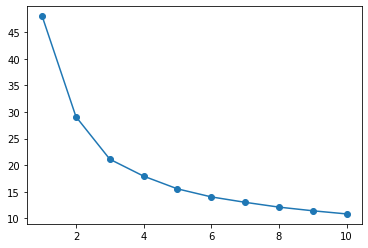

In [80]:
plt.plot(range(1,11), inertia, marker='o');

In [81]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

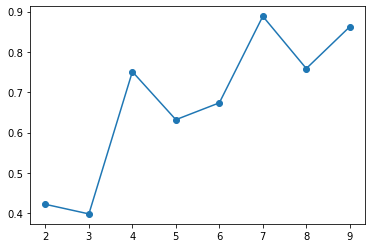

In [82]:
plt.plot(range(2,10), D, marker='o');

### 3 кластера

In [83]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(X_scaled)
labels = kmeans.labels_

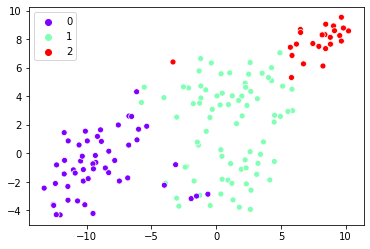

In [84]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [86]:
data['labels'] = labels

In [88]:
data.tail()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,labels
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0
155,2.853,0.306,0.575,0.295,0.010,0.202,0.091,0


In [89]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.333333
1    0.512821
2    0.153846
Name: labels, dtype: float64

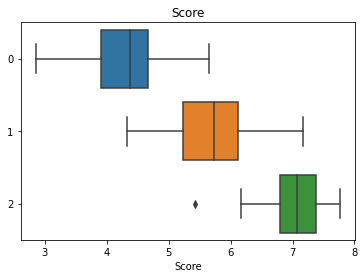

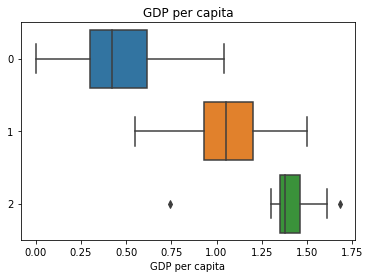

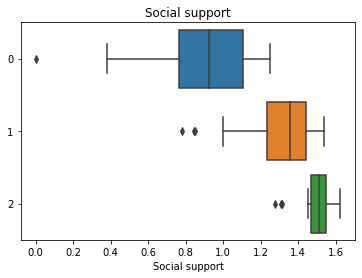

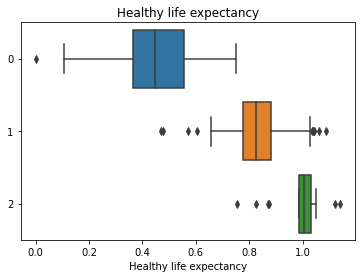

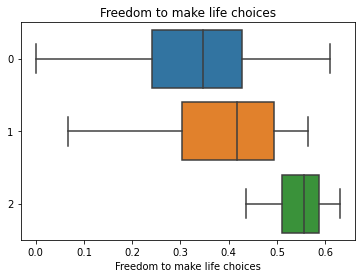

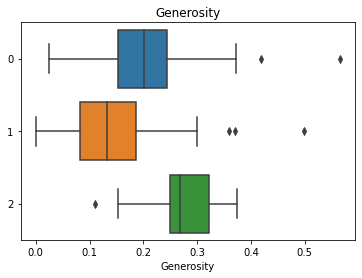

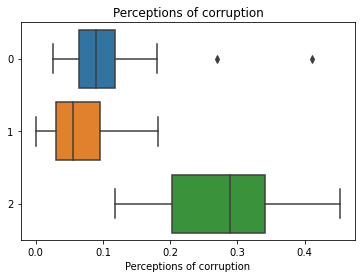

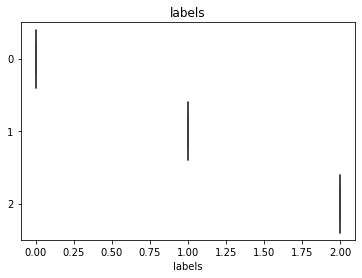

In [90]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [91]:
data.groupby('labels').median().T.round(2)

labels,0,1,2
Score,4.38,5.73,7.07
GDP per capita,0.42,1.05,1.38
Social support,0.92,1.36,1.51
Healthy life expectancy,0.45,0.83,1.00
Freedom to make life choices,0.35,0.42,0.56
Generosity,0.20,0.13,0.27
Perceptions of corruption,0.09,0.06,0.29


В какой кластер попадет Россия?

In [92]:
country_df = pd.DataFrame(country)

In [93]:
country_df['labels'] = labels

In [94]:
country_df.sample(15).sort_values('labels')

,Country or region,labels
143,Lesotho,0
99,Nepal,0
117,Guinea,0
121,Mauritania,0
154,Central African Republic,0
34,El Salvador,1
54,Estonia,1
70,Moldova,1
68,Philippines,1
25,Chile,1


In [95]:
country_df[country_df['Country or region'] == 'Russia']

,Country or region,labels
67,Russia,1


### 4 кластера

In [96]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(X_scaled)
labels = kmeans.labels_

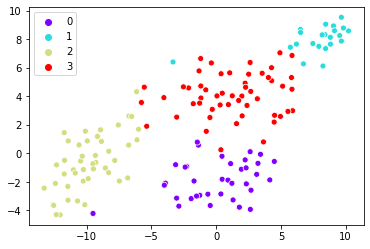

In [97]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [98]:
data['labels'] = labels

In [99]:
data['labels'].value_counts(normalize=True)

3    0.333333
2    0.288462
0    0.237179
1    0.141026
Name: labels, dtype: float64

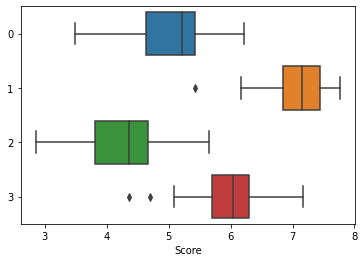

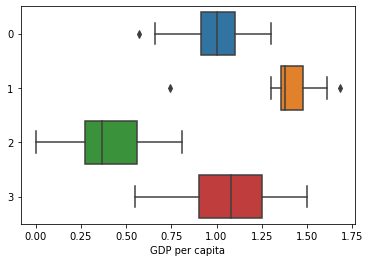

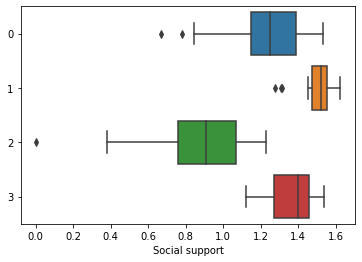

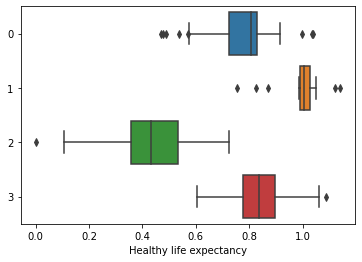

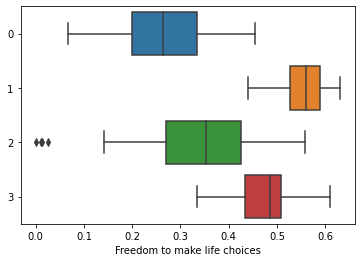

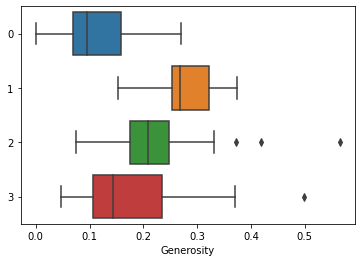

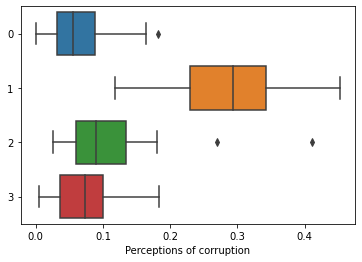

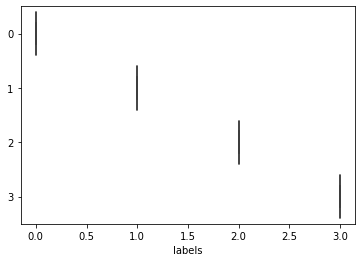

In [100]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

In [101]:
data.groupby('labels').median().T.round(2)

labels,0,1,2,3
Score,5.21,7.16,4.36,6.04
GDP per capita,1.00,1.38,0.37,1.08
Social support,1.25,1.52,0.91,1.40
Healthy life expectancy,0.80,1.00,0.43,0.84
Freedom to make life choices,0.26,0.56,0.35,0.49
Generosity,0.10,0.27,0.21,0.14
Perceptions of corruption,0.06,0.29,0.09,0.07


В какой кластер попадет Россия?

In [102]:
country_df['labels'] = labels

In [103]:
country_df.sample(15).sort_values('labels')

,Country or region,labels
107,Venezuela,0
109,Palestinian Territories,0
106,Albania,0
132,Ukraine,0
125,Iraq,0
53,South Korea,0
116,Iran,0
1,Denmark,1
142,Madagascar,2
137,Zambia,2


In [104]:
country_df[country_df['Country or region'] == 'Russia']

,Country or region,labels
67,Russia,0


## 4.2 Gaussian mixtures

### 3 кластера

In [105]:
gauss = GaussianMixture(n_components=3, random_state=10).fit(X_scaled)
labels = gauss.predict(X_scaled)

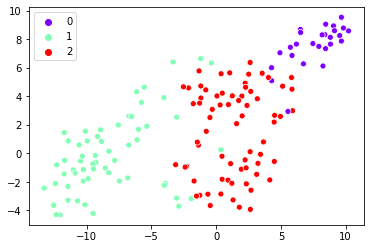

In [106]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

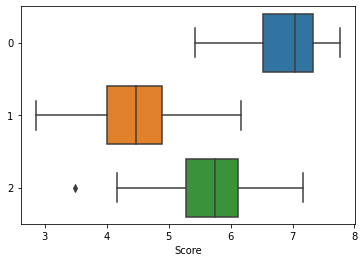

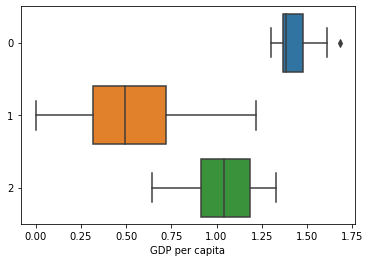

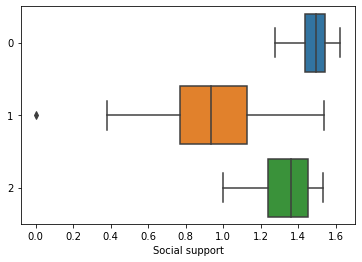

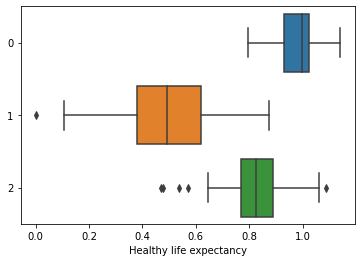

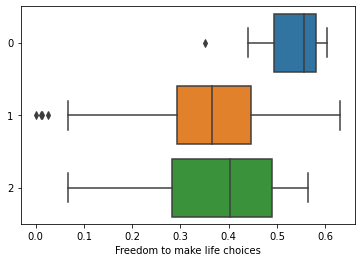

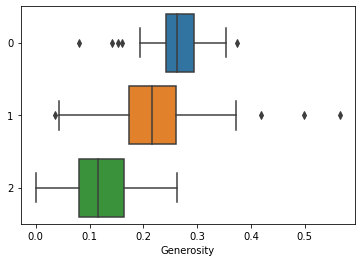

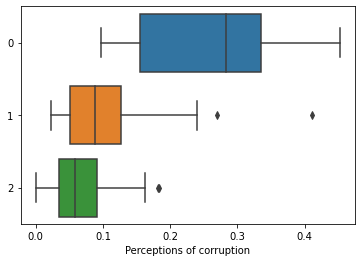

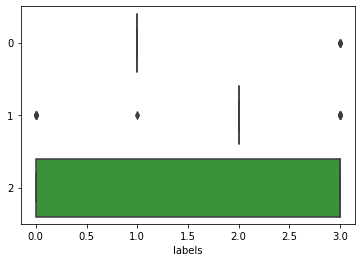

In [107]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

In [108]:
data['labels'] = labels

In [109]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.166667
1    0.384615
2    0.448718
Name: labels, dtype: float64

In [110]:
data.groupby('labels').median().T.round(2)

labels,0,1,2
Score,7.04,4.48,5.75
GDP per capita,1.38,0.49,1.04
Social support,1.50,0.93,1.36
Healthy life expectancy,1.00,0.49,0.83
Freedom to make life choices,0.56,0.37,0.40
Generosity,0.26,0.22,0.12
Perceptions of corruption,0.28,0.09,0.06


### 4 кластера

In [111]:
gauss = GaussianMixture(n_components=4, random_state=10).fit(X_scaled)
labels = gauss.predict(X_scaled)

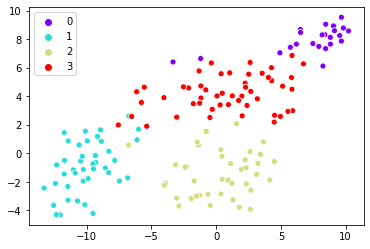

In [112]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [113]:
data['labels'] = labels

In [114]:
data['labels'].value_counts(normalize=True)

3    0.320513
1    0.269231
2    0.262821
0    0.147436
Name: labels, dtype: float64

In [115]:
data.groupby('labels').median().T.round(2)

labels,0,1,2,3
Score,7.09,4.36,5.21,6.04
GDP per capita,1.38,0.35,1.04,1.05
Social support,1.52,0.90,1.29,1.36
Healthy life expectancy,1.00,0.43,0.79,0.84
Freedom to make life choices,0.56,0.34,0.29,0.49
Generosity,0.27,0.20,0.11,0.15
Perceptions of corruption,0.29,0.09,0.06,0.08
